<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Consolidation" data-toc-modified-id="Consolidation-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Consolidation</a></span><ul class="toc-item"><li><span><a href="#Attribute-Description" data-toc-modified-id="Attribute-Description-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Attribute Description</a></span></li></ul></li></ul></li><li><span><a href="#Visual-Analytics" data-toc-modified-id="Visual-Analytics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visual Analytics</a></span></li></ul></div>

In [7]:
# Data Wrangling
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)

# Helper Functions
import AnalyseHelpers as a
import CleanseHelpers as c

from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
np.random.seed(123)

# Visualisation
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 5.0]
import seaborn as sns
sns.set(font_scale=1)
# Set the styling for dataframes
dfstyles = [dict(selector="caption", props=[("font-size", "120%"),("color", "black"),("text-align", "center")])]
from IPython.display import display,HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>NOTE</b>: CleanseHelpers and AnalyseHelpers are supplementary modules, and should reside in the same directory as this notebook
<br>
The code for this notebook is, by default, hidden. To display the code cells, click <a href="javascript:code_toggle()">here</a>.\r\n''')

### Consolidation

In [8]:
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Attribute Description

In [11]:
print(str(boston_data['DESCR']))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
# Profile the data using helper function
display(a.dataprofile(df).style.set_table_styles(dfstyles).set_caption('Data profile: Boston Housing data'))

,Column,Max Length Value,Max Length,Min Length Value,Min Length,Null #,Null %,Data Type,Unique Values,Row Count,Mean,Max,Min
0,CRIM,0.00632,7,0.1,3,0,0,float64,504,506,3.61352,88.9762,0.00632
1,ZN,100,5,0,3,0,0,float64,26,506,11.3636,100,0
2,INDUS,10.81,5,4,3,0,0,float64,76,506,11.1368,27.74,0.46
3,CHAS,0,3,0,3,0,0,float64,2,506,0.06917,1,0
4,NOX,0.4161,6,0.4,3,0,0,float64,81,506,0.554695,0.871,0.385
5,RM,6.575,5,6.8,3,0,0,float64,446,506,6.28463,8.78,3.561
6,AGE,100,5,2.9,3,0,0,float64,356,506,68.5749,100,2.9
7,DIS,10.7103,7,2.1,3,0,0,float64,412,506,3.79504,12.1265,1.1296
8,RAD,24,4,1,3,0,0,float64,9,506,9.54941,24,1
9,TAX,296,5,296,5,0,0,float64,66,506,408.237,711,187


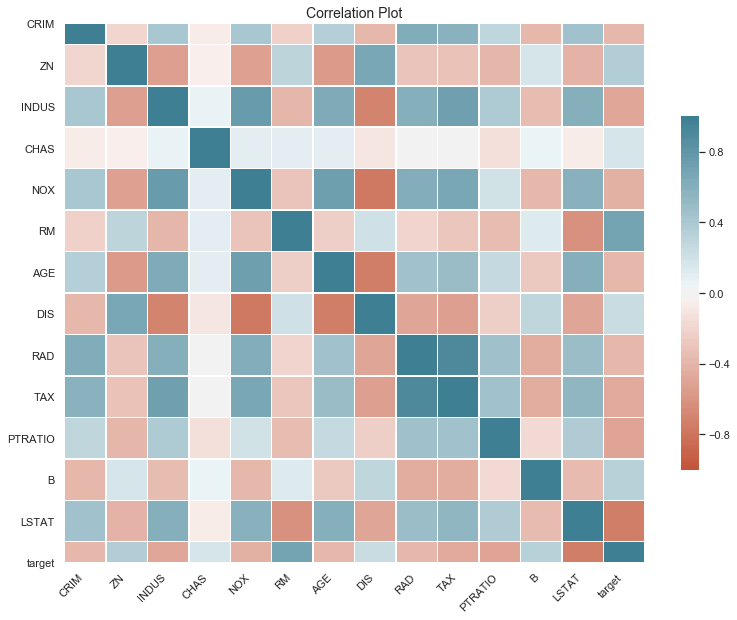

In [13]:
plt.rcParams['figure.figsize'] = [13.0, 13.0]
# Correlation plot for Numerical variables

ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=0.5 , cbar_kws={"shrink": 0.5},
    #annot=True,
    #annot_kws={"size": 12}
)

ax.set_title("Correlation Plot",size= 14)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

plt.show()

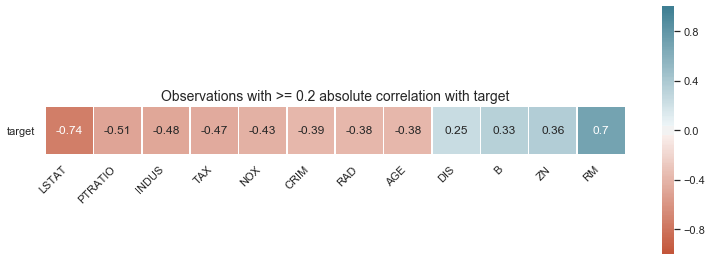

In [14]:
corr = df.corr()
# Observations with significant +ve or -ve correllation with over 50k
corr2 = pd.DataFrame(corr['target'][(corr['target'].abs() < 1) & (corr['target'].abs() >= 0.2)])

ax = sns.heatmap(
    corr2.sort_values(by='target').T, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=0.5 , cbar_kws={"shrink": 0.35},
    annot=True,
    annot_kws={"size": 12}
)

ax.set_title("Observations with >= 0.2 absolute correlation with target",size= 14)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

plt.show()

## Visual Analytics

explained variance ratio (first  10  components): [0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137]


ValueError: 'c' argument has 506 elements, which is not acceptable for use with 'x' with size 1, 'y' with size 1.

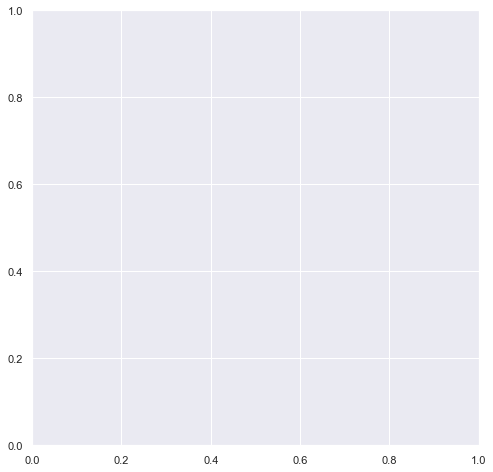

In [15]:
scaler = StandardScaler()
plt.rcParams['figure.figsize'] = [8.0, 8.0]

X = df.drop(['target'], axis=1)
X_scaled = np.array(pd.DataFrame(scaler.fit_transform(X), columns = X.columns))
y = pd.cut(np.array(df['target']), 5, labels=False)
target_names = [0,1,2,3,4]

comp = 10

pca = PCA(n_components=comp)
X_r = pca.fit(X_scaled).transform(X_scaled)

# Percentage of variance explained for each components
print('explained variance ratio (first ', comp, ' components):', str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise']
lw = 2

#for color, i, target_name in zip(colors, [0,1], target_names):
#    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
#                label=target_name)
    
plt.scatter(X_r[0, 0], X_r[0, 1],c=y)    
#plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('PCA')

plt.show()

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
import pandas as pd
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold
from sklearn import datasets

# Non-metric

#mercel kernal

# Load the iris data
#iris = datasets.load_iris()
#X = iris.data
#target = iris.target
#names = iris.target_name

print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X_scaled)
print("Done. Stress: %f" % clf.stress_)

plt.scatter(X_mds[:,0],X_mds[:,1],c=y)
plt.axis('equal');
plt.show()


In [ ]:
from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
#Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

In [ ]:
X

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = np.array(df_prepared[['Age','Education-Num','hours-per-week']])
y = np.array(df_prepared['income'])
target_names = ['<=50K','>50K'] 

n_neighbors = 3
random_state = 0

# Load Digits dataset
#X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=None))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca)]#,('LDA', lda), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

In [ ]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.2, 0.10, 0.98, 0.94, 0.7, 0.7)

plt.show()